Задача. Построить нечеткую базу знаний (использовать не менее 3 лингвистических переменных) для задачи регулирования реверсного движения на волжском мосту (учитывать время, интенсивность потока, день недели и т.д.), проверить ее на полноту и произвести нечеткий вывод для конкретных значений (выбрать случайным образом)


Решение.
Зависимости:
1. Зависимость от времени суток:
   - В раннее утро (0-8 часов) обычно наблюдается низкая интенсивность движения, что может требовать низкого уровня регулирования на мосту.
   - В утренние часы (6-14 часов) интенсивность движения может быть средней, что соответствует среднему уровню регулирования.
   - В дневные часы (12-20 часов), особенно в будние дни, интенсивность движения может быть высокой, требуя высокого уровня регулирования.
   - В вечерние часы (16-24 часа), особенно в выходные дни, интенсивность движения может оставаться высокой, что также требует высокого уровня регулирования.

2. Зависимость от интенсивности потока:
   - Низкая интенсивность потока чаще всего требует низкого уровня регулирования, особенно в периоды раннего утра или ночи.
   - Средняя интенсивность потока может соответствовать среднему уровню регулирования, который может быть необходим в разные часы дня.
   - Высокая интенсивность потока, особенно в часы пик и в будние дни, часто требует высокого уровня регулирования на мосту для обеспечения безопасности и эффективности движения.

3. Зависимость от дня недели:
   - В будние дни интенсивность движения обычно выше, особенно в часы пик, что может потребовать более интенсивного регулирования на мосту.
   - В выходные дни интенсивность движения также может быть высокой, особенно вечером, когда люди могут выезжать на отдых или встречи, что также требует активного регулирования.
Правила:
1. Если время - раннее утро, интенсивность потока - низкая, и день недели - будний день, то регулирование на мосту будет низким.
2. Если время - утро, и интенсивность потока - средняя, то регулирование на мосту будет средним.
3. Если время - день, интенсивность потока - высокая, и день недели - будний день, то регулирование на мосту будет высоким.
4. Если время - вечер, и интенсивность потока - средняя, то регулирование на мосту будет средним.
5. Если время - вечер, интенсивность потока - высокая, и день недели - выходной, то регулирование на мосту будет высоким.

Входные переменные(b, T, X, G):

(время, {раннее утро, утро, день, вечер}, [0,24])
(интенсивность движения, {низкая, средняя, высокая}, [0,100])
(день недели, {будние, выходные}, [0,7])

Выходная переменная: (уровень регулирования, {низкое, среднее, высокое}, [0,100])


In [ ]:
!pip install -U scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=49d69de98513b6ed1950e006988e5de2f5162bb82e03640620335ed955d9c260
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


74.99999999999999


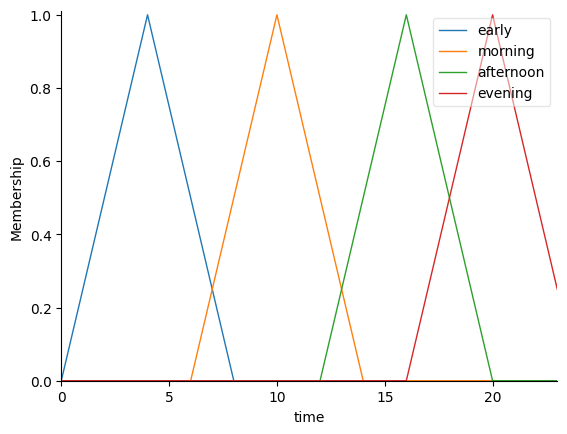

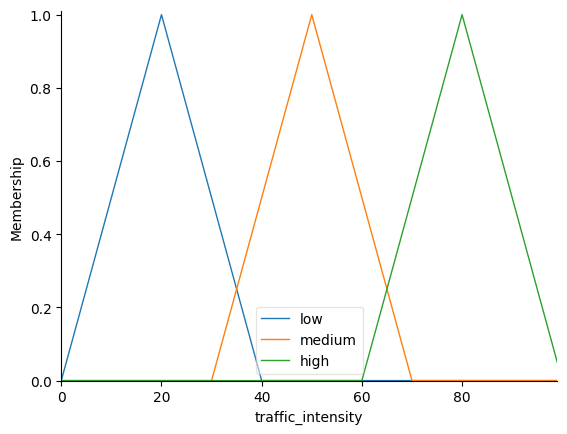

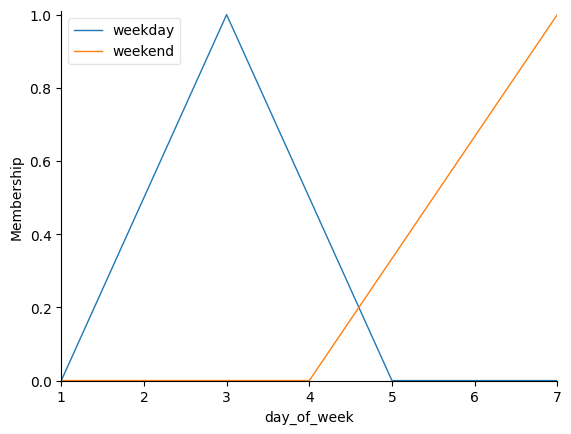

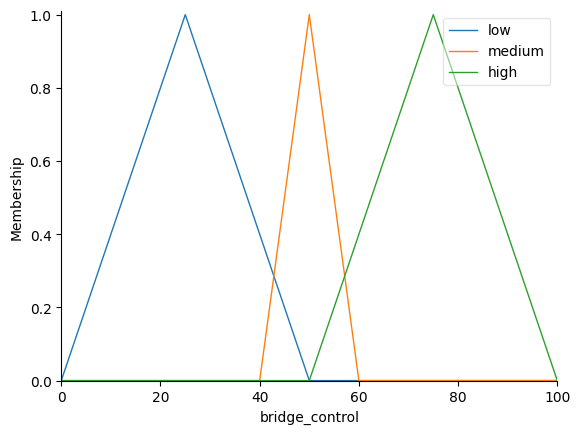

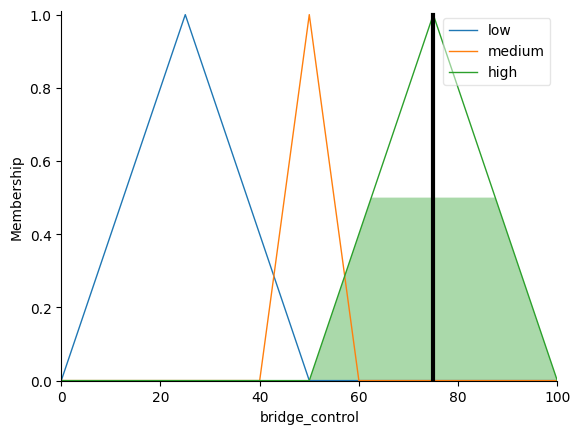

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Определение антецедентов (входных переменных)
time = ctrl.Antecedent(np.arange(0, 24, 1), 'time')  # Время (часы)
traffic_intensity = ctrl.Antecedent(np.arange(0, 100, 1), 'traffic_intensity')  # Интенсивность потока
day_of_week = ctrl.Antecedent(np.arange(1, 8, 1), 'day_of_week')  # День недели (1 - Понедельник, 7 - Воскресенье)

# Определение консеквента (выходной переменной)
bridge_control = ctrl.Consequent(np.arange(0, 101, 1), 'bridge_control')  # Регулирование на мосту (%)

# Определение функций принадлежности
time['early'] = fuzz.trimf(time.universe, [0, 4, 8])  # Раннее утро (0-8 часов)
time['morning'] = fuzz.trimf(time.universe, [6, 10, 14])  # Утро (6-14 часов)
time['afternoon'] = fuzz.trimf(time.universe, [12, 16, 20])  # День (12-20 часов)
time['evening'] = fuzz.trimf(time.universe, [16, 20, 24])  # Вечер (16-24 часов)

traffic_intensity['low'] = fuzz.trimf(traffic_intensity.universe, [0, 20, 40])  # Низкая интенсивность
traffic_intensity['medium'] = fuzz.trimf(traffic_intensity.universe, [30, 50, 70])  # Средняя интенсивность
traffic_intensity['high'] = fuzz.trimf(traffic_intensity.universe, [60, 80, 100])  # Высокая интенсивность

day_of_week['weekday'] = fuzz.trimf(day_of_week.universe, [1, 3, 5])  # Рабочие дни (понедельник-пятница)
day_of_week['weekend'] = fuzz.trimf(day_of_week.universe, [4, 7, 7])  # Выходные (суббота-воскресенье)

bridge_control['low'] = fuzz.trimf(bridge_control.universe, [0, 25, 50])  # Низкий уровень регулирования
bridge_control['medium'] = fuzz.trimf(bridge_control.universe, [40, 50, 60])  # Средний уровень регулирования
bridge_control['high'] = fuzz.trimf(bridge_control.universe, [50, 75, 100])  # Высокий уровень регулирования

# Построение графиков функций принадлежности
time.view()
traffic_intensity.view()
day_of_week.view()
bridge_control.view()

# Построение правил
rule1 = ctrl.Rule(time['early'] & traffic_intensity['low'] & day_of_week['weekday'], bridge_control['low'])
rule2 = ctrl.Rule(time['morning'] & traffic_intensity['medium'], bridge_control['medium'])
rule3 = ctrl.Rule(time['afternoon'] & traffic_intensity['high'] & day_of_week['weekday'], bridge_control['high'])
rule4 = ctrl.Rule(time['evening'] & traffic_intensity['medium'], bridge_control['medium'])
rule5 = ctrl.Rule(time['evening'] & traffic_intensity['high'] & day_of_week['weekend'], bridge_control['high'])

# Построение системы управления
bridge_ctrl_system = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
bridge_simulator = ctrl.ControlSystemSimulation(bridge_ctrl_system)

# Установка входных значений
bridge_simulator.input['time'] = 18  # Время вечернее (18 часов)
bridge_simulator.input['traffic_intensity'] = 75  # Высокая интенсивность
bridge_simulator.input['day_of_week'] = 6  # Суббота

# Вычисление результата
bridge_simulator.compute()
print(bridge_simulator.output['bridge_control'])

# Визуализация вывода
bridge_control.view(sim=bridge_simulator)
